<a href="https://colab.research.google.com/github/mdob367/stable_diffusion/blob/main/image_2_image_using_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image2Image Pipeline for Stable Diffusion using 🧨 Diffusers 

This notebook shows how to create a custom `diffusers` pipeline for  text-guided image-to-image generation with Stable Diffusion model using  🤗 Hugging Face [🧨 Diffusers library](https://github.com/huggingface/diffusers). 

For a general introduction to the Stable Diffusion model please refer to this [colab](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb).



In [1]:
!nvidia-smi

Sun Nov 27 21:41:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    13W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#@title Image to Image Setup
!pip install diffusers==0.3.0 transformers ftfy
!pip install -qq "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 153 kB 13.3 MB/s 
     |████████████████████████████████| 5.5 MB 26.2 MB/s 
     |████████████████████████████████| 53 kB 628 kB/s 
     |████████████████████████████████| 182 kB 57.2 MB/s 
     |████████████████████████████████| 7.6 MB 53.2 MB/s 
     |████████████████████████████████| 1.6 MB 14.5 MB/s 


In [8]:
#@title Setup
import subprocess

def setup():
    install_cmds = [
#        ['pip', 'install', 'ftfy', 'gradio', 'regex', 'tqdm', 'transformers==4.21.2', 'timm', 'fairscale', 'requests'],
# Don't reinstall ftfy and transformers
        ['pip', 'install', 'gradio', 'regex', 'tqdm', 'timm', 'fairscale', 'requests'],
        ['pip', 'install', '-e', 'git+https://github.com/openai/CLIP.git@main#egg=clip'],
        ['pip', 'install', '-e', 'git+https://github.com/pharmapsychotic/BLIP.git@lib#egg=blip'],
        ['git', 'clone', 'https://github.com/pharmapsychotic/clip-interrogator.git']
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()

import sys
sys.path.append('src/blip')
sys.path.append('src/clip')
sys.path.append('content/clip-interrogator')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining clip from git+https://github.com/openai/CLIP.git@main#egg=clip
  Updating ./src/clip clone (to revision main)
  Attempting uninstall: clip
    Found existing installation: clip 1.0
    Can't uninstall 'clip'. No files were found to uninstall.
  Running setup.py develop for clip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining blip from git+https://github.com/pharmapsychotic/BLIP.git@lib#egg=blip
  Updating ./src/blip clone (to revision lib)
  Attempting uninstall: blip
    Found existing installation: blip 1.0
    Can't uninstall 'blip'. No files were found to uninstall.
  Running setup.py develop for blip




In [9]:
print(sys.path)

['/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', 'src/blip', 'src/clip', 'clip-interrogator', 'src/blip', 'src/clip', 'clip-interrogator', 'src/blip', 'src/clip', 'content/clip-interrogator']


In [13]:
#@title Img2Txt Setup part 2
import gradio as gr
from clip_interrogator import Interrogator, Config

ci = Interrogator(Config())

def img2txt_inference(image, mode):
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    else:
        return ci.interrogate_fast(image)

Loading BLIP model...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

  0%|          | 0.00/1.66G [00:00<?, ?B/s]

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_caption.pth
Loading CLIP model...


100%|████████████████████████████████████████| 890M/890M [00:08<00:00, 111MiB/s]
Preprocessing trendings: 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]


In [10]:
#@title Image to prompt! 🖼️ -> 📝
   
inputs = [
    gr.inputs.Image(type='pil'),
    gr.Radio(['best', 'classic', 'fast'], label='', value='best'),
]
outputs = [
    gr.outputs.Textbox(label="Output"),
]

io = gr.Interface(
    img2txt_inference, 
    inputs, 
    outputs, 
    allow_flagging=False,
)
io.launch()


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

You need to accept the model license before downloading or using the weights. In this post we'll use model version `v1-4`, so you'll need to  visit [its card](https://huggingface.co/CompVis/stable-diffusion-v1-4), read the license and tick the checkbox if you agree. 

You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work. For more information on access tokens, please refer to [this section of the documentation](https://huggingface.co/docs/hub/security-tokens).

In [15]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


## Image2Image pipeline.

In [18]:
!pip install diffusers==0.3.0 transformers ftfy
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Load the pipeline

In [20]:
device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
)
pipe = pipe.to(device)

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

AttributeError: ignored

In [ ]:
# Code for displaying images in a grid
def image_grid(imgs):
    rows, cols = get_rows_cols(len(imgs))
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

def get_rows_cols(count):
    if count%3==0:
      return (int(count/3), 3)
    elif count%2==0:
      return (int(count/2), 2)
    else:
      return (count, 1)


Download an initial image and preprocess it so we can pass it to the pipeline.

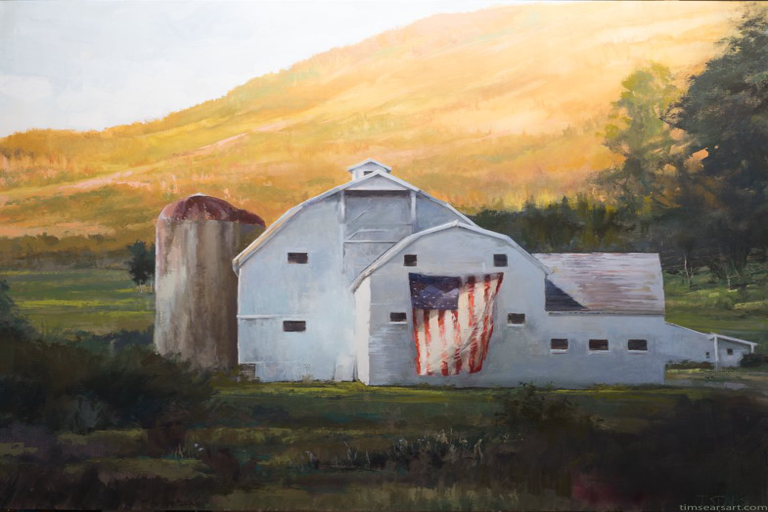

In [44]:
import requests
from io import BytesIO
from PIL import Image

#url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
#url = "https://images.squarespace-cdn.com/content/v1/5cf6c6ec16407500018ef4c5/1642539610645-0AC5NZZQM82P2JDDZ9S1/final-wm.jpg?format=1000w"
url = "https://images.squarespace-cdn.com/content/v1/5cf6c6ec16407500018ef4c5/1658949026175-YB7DND3O7UTTO8RCILIL/final-wm-web-sm.jpg?format=1000w"

response = requests.get(url)
init_img = Image.open(BytesIO(response.content)).convert("RGB")
init_img = init_img.resize((768, 512))
img2txt_inference(image, mode)
init_img

Define the prompt and run the pipeline.
Here, `strength` is a value between 0.0 and 1.0, that controls the amount of noise that is added to the input image. Values that approach 1.0 allow for lots of variations but will also produce images that are not semantically consistent with the input.

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

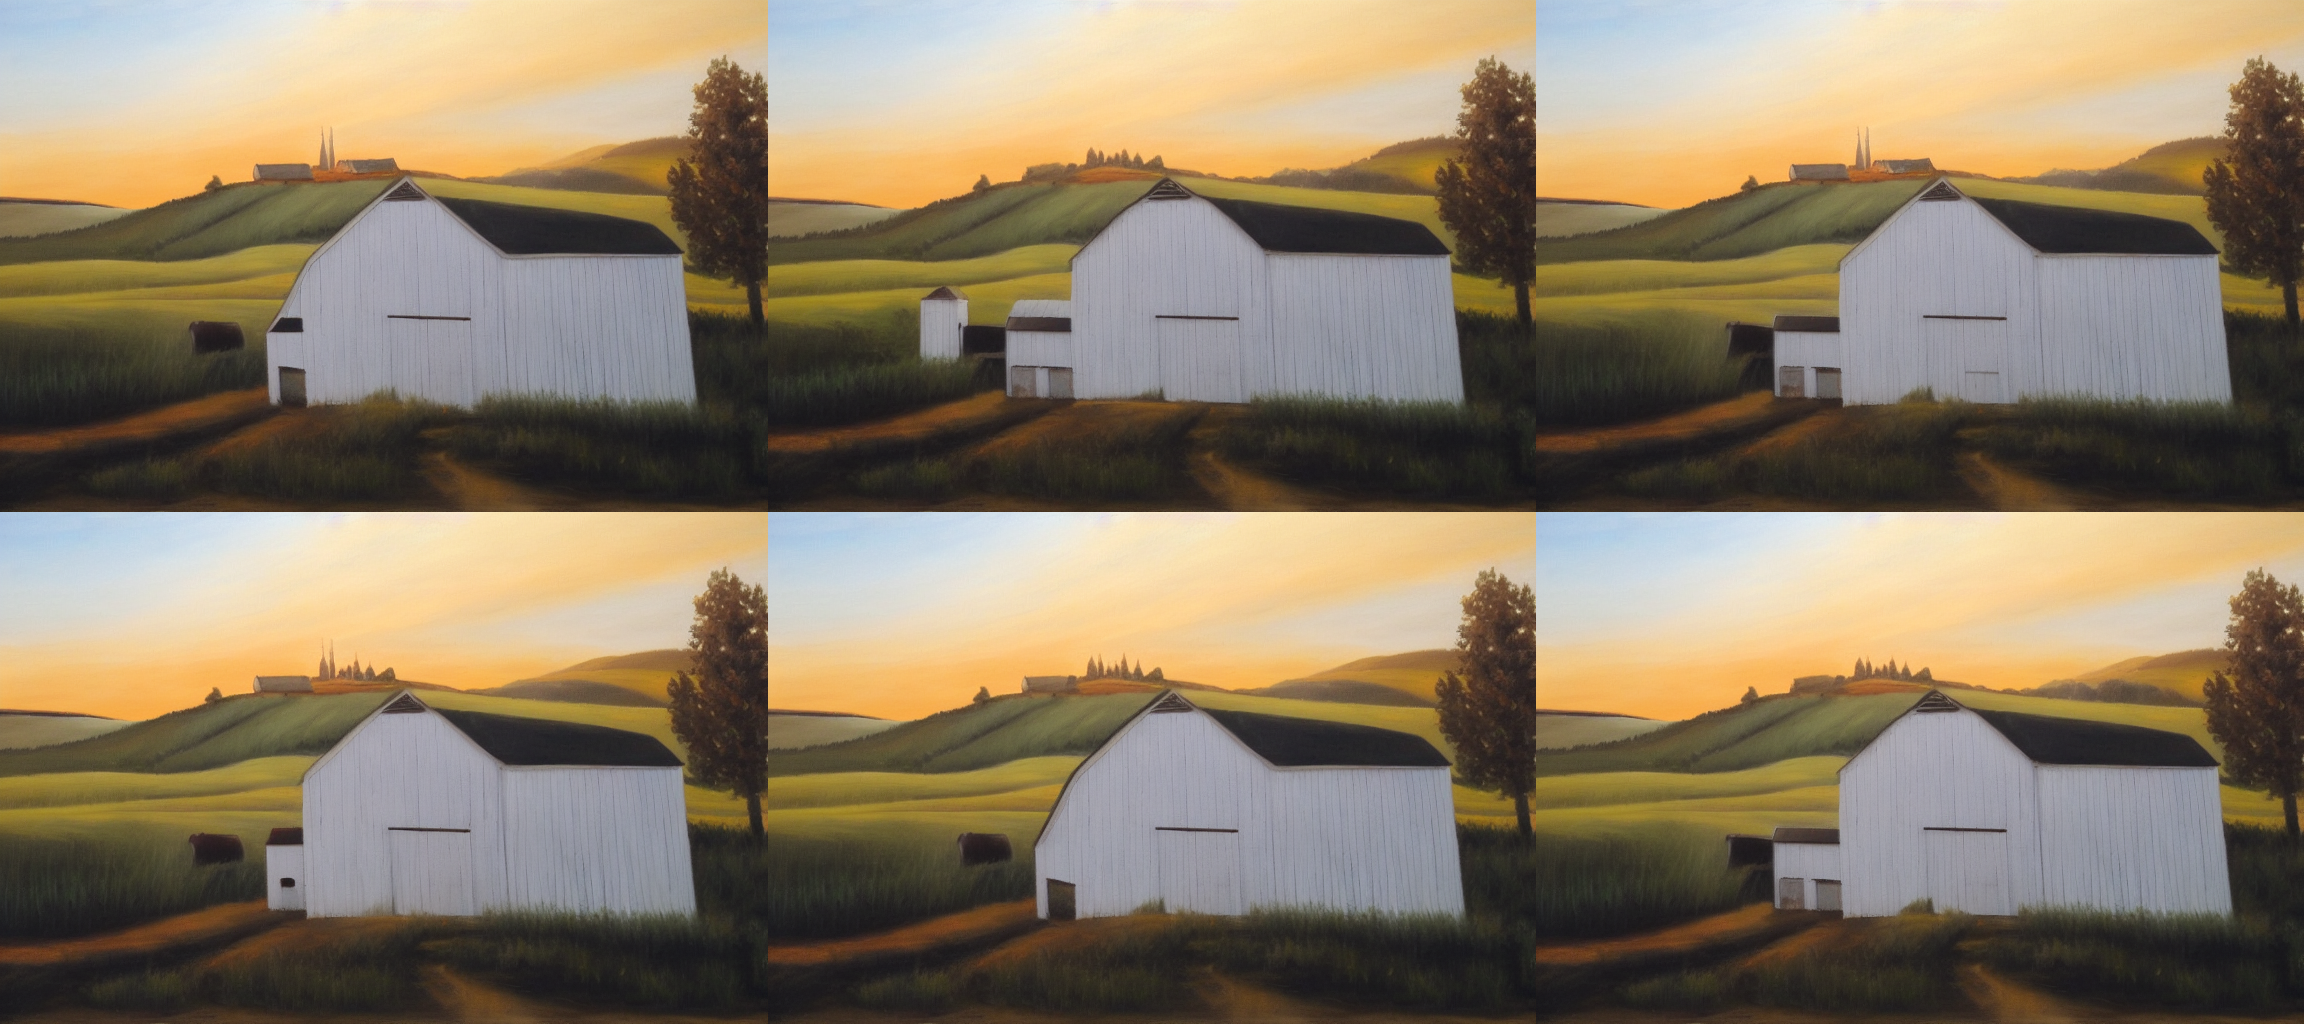

In [48]:
roof_types = ['Gable', 'Gambrel', 'Mansard', 'Salt Box', 'Round', 'Hip']
#roof_types=['Gable']
imgs=[]
for roof_type in roof_types:
  #prompt = "An oil painting of snowy scene with a single building. Shrubs in the foreground. Barn in the middle ground next to 2 silos. Mountains in the background. The barn is white and has a {} roof".format(roof_type)
  prompt = "An oil painting of sunset scene with a large barn. Grass in the foreground. Barn in the middle ground next to 2 silos. Hills in the background. The barn is white, has an American flag, and has a {} roof".format(roof_type)
  generator = torch.Generator(device=device).manual_seed(1024)
  with autocast("cuda"):
      imgs.append(pipe(prompt=prompt, init_image=init_img, strength=0.75, guidance_scale=8.5, generator=generator, num_inference_steps = 100).images[0])
grid = image_grid(imgs)
grid

  0%|          | 0/26 [00:00<?, ?it/s]

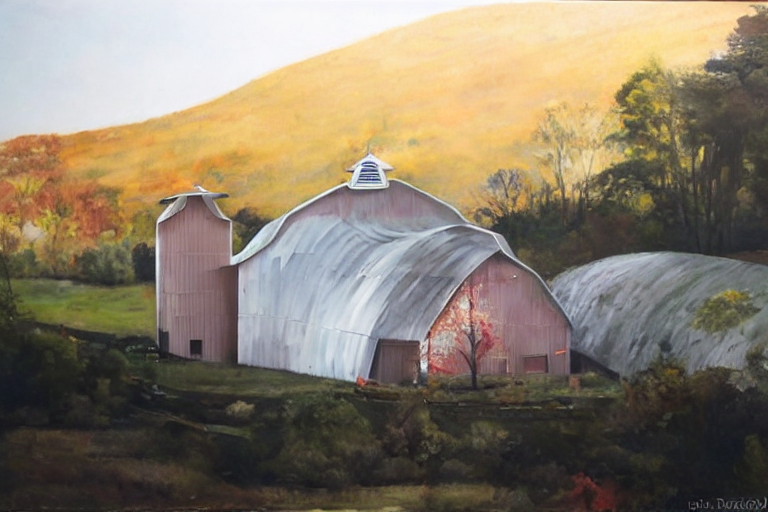

In [17]:
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.5, guidance_scale=7.5, generator=generator).images[0]

image

As you can see, when using a lower value for `strength`, the generated image is more closer to the original `init_image`


Now using [LMSDiscreteScheduler](https://huggingface.co/docs/diffusers/api/schedulers#diffusers.LMSDiscreteScheduler)

In [19]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")
pipe.scheduler = lms

  0%|          | 0/37 [00:00<?, ?it/s]

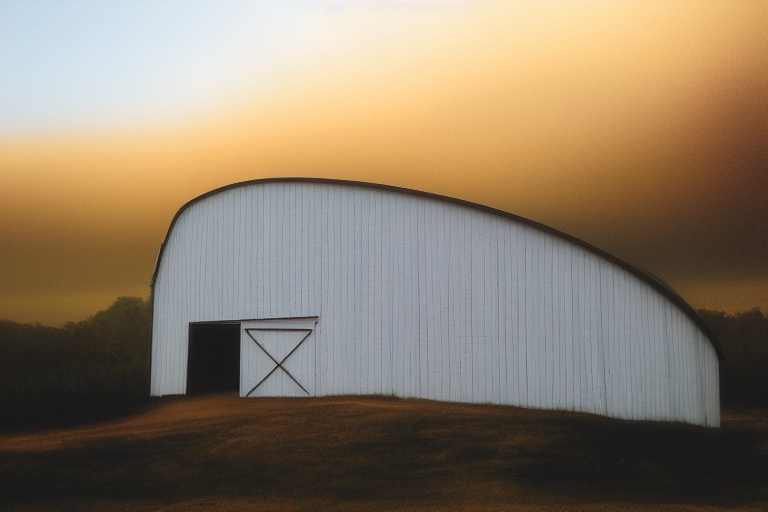

In [22]:
generator = torch.Generator(device=device).manual_seed(1024)
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image